## Background
According to the most recent Global Burden of Disease (GBD) estimates, there were around 12.2 million incident cases of stroke of which 6.6 million deaths globally in 2019, making stroke the second leading cause of death and the third leading cause of disability worldwide.
It is important to detect storke risk, our objective is to develope model which give us best model to detect stork, to achieve we will use 2nd dataset provided in the class.

## Research Quesiton

1. How do demographic factors (e.g., age, sex), social factors (e.g., marital status, employment, residence type), lifestyle habits (e.g., smoking status) influence stroke risk?
2. Are individuals with comorbidities, such as (eg., hypertension, diabetes, obesity, heart disease) more likely to experience a stroke?


# Dataset
The dataset comprises 4,254 patients in Ontario aged 18 to 82, from both urban and rural areas.

### Import Necessary Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import warnings

import seaborn as sns
import matplotlib.pyplot as plt


warnings.filterwarnings('ignore')

In [2]:
#Use this if you are running the code on Colab
from google.colab import files
import io

uploaded = files.upload()

Saving Datathon #2 - Cardiovascular Health.csv to Datathon #2 - Cardiovascular Health (1).csv


In [3]:
source_df = pd.read_csv('/content/Datathon #2 - Cardiovascular Health.csv')

idx = source_df['id']
source_df.drop('id', axis=1, inplace=True)
source_df.head()

,gender,age,hypertension,heart_disease,ever_married,employment,residence_type,random_glucose,bmi,smoking_status,stroke
0,Male,67,0,1,Yes,Private Sector,Urban,228.69,36.6,Former Smoker,1
1,Female,61,0,0,Yes,Self-employed,Rural,202.21,NaN,Never Smoker,1
2,Male,80,0,1,Yes,Private Sector,Rural,105.92,32.5,Never Smoker,1
3,Female,49,0,0,Yes,Private Sector,Urban,171.23,34.4,Active Smoker,1
4,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,Never Smoker,1


### EDA for feature inspection

In [4]:
#change hypertension ,  stroke and heart_disease into categorical variable

categorical_columns = ['gender', 'ever_married', 'employment', 'residence_type', 'smoking_status']
boolean_columns = ['hypertension', 'heart_disease', 'stroke']
cat_cols = categorical_columns + boolean_columns
source_df[cat_cols] = source_df[cat_cols].astype('category')
source_df.head()

,gender,age,hypertension,heart_disease,ever_married,employment,residence_type,random_glucose,bmi,smoking_status,stroke
0,Male,67,0,1,Yes,Private Sector,Urban,228.69,36.6,Former Smoker,1
1,Female,61,0,0,Yes,Self-employed,Rural,202.21,NaN,Never Smoker,1
2,Male,80,0,1,Yes,Private Sector,Rural,105.92,32.5,Never Smoker,1
3,Female,49,0,0,Yes,Private Sector,Urban,171.23,34.4,Active Smoker,1
4,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,Never Smoker,1


In [5]:
description = source_df.describe()
description

,age,random_glucose,bmi
count,4254.000000,4254.000000,4073.000000
mean,50.202163,108.514394,30.432752
std,17.829035,47.769400,7.235143
min,18.000000,55.120000,11.300000
25%,36.000000,77.482500,25.400000
50%,50.500000,92.465000,29.200000
75%,64.000000,116.135000,34.200000
max,82.000000,271.740000,92.000000


In [6]:
missing_values = source_df.isnull().sum()

print("Missing Values:")
print(missing_values)

Missing Values:
gender              0
age                 0
hypertension        0
heart_disease       0
ever_married        0
employment          0
residence_type      0
random_glucose      0
bmi               181
smoking_status      0
stroke              0
dtype: int64


In [7]:
# inspect null value in bmi variable
print(source_df.shape[0])
print(source_df[source_df['bmi'].isnull()].shape[0])

4254
181


### Address class imbalance if it exists


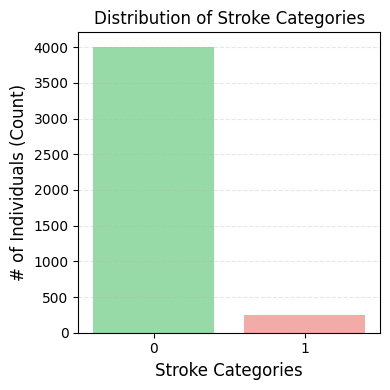

In [8]:
c = sns.color_palette("pastel")

value_counts = source_df['stroke'].value_counts()
category_order = value_counts.index.to_list()

category_colors = [c[2], c[3]]

plt.figure(figsize=(4, 4))
sns.barplot(x=category_order, y=value_counts.values, palette=category_colors)
plt.title('Distribution of Stroke Categories', fontsize=12)
plt.ylabel('# of Individuals (Count)', fontsize=12)
plt.xlabel('Stroke Categories', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

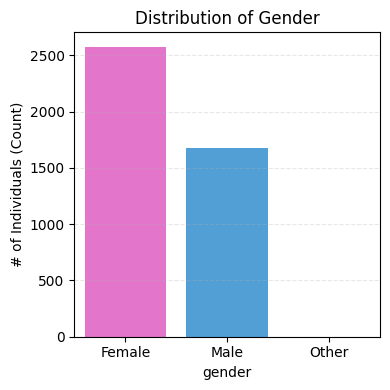

In [9]:
c = sns.color_palette("husl", 9)
gender_c = source_df['gender'].value_counts()
plt.figure(figsize=(4, 4))
sns.barplot(x=gender_c.index, y=gender_c.values, palette={'Male': c[6], 'Female': c[8] , 'Other' : c[1]})
plt.title('Distribution of Gender')
plt.xlabel('gender')
plt.ylabel('# of Individuals (Count)')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


In [10]:
source_df = source_df[source_df['gender'] != 'Other'].reset_index(drop=True)
source_df = source_df[source_df['smoking_status'] != 'Unknown'].reset_index(drop=True)

In [11]:
# pure categorical values according to Quercus: ['gender', 'ever_married', 'employment', 'residence_type', 'smoking_status']
categorical_cols = source_df.select_dtypes(exclude=['number']).columns
numerical_cols = source_df.select_dtypes(include=['number']).columns

for col in categorical_cols:
    print(f"Column: {col}")
    print(f"Unique values: {source_df[col].unique()}")
    print(f"Value counts:\n{source_df[col].value_counts()}")
    print("-" * 20)

Column: gender
Unique values: ['Male', 'Female']
Categories (3, object): ['Female', 'Male', 'Other']
Value counts:
gender
Female    2064
Male      1327
Other        0
Name: count, dtype: int64
--------------------
Column: hypertension
Unique values: [0, 1]
Categories (2, int64): [0, 1]
Value counts:
hypertension
0    2945
1     446
Name: count, dtype: int64
--------------------
Column: heart_disease
Unique values: [1, 0]
Categories (2, int64): [0, 1]
Value counts:
heart_disease
0    3163
1     228
Name: count, dtype: int64
--------------------
Column: ever_married
Unique values: ['Yes', 'No']
Categories (2, object): ['No', 'Yes']
Value counts:
ever_married
Yes    2710
No      681
Name: count, dtype: int64
--------------------
Column: employment
Unique values: ['Private Sector', 'Self-employed', 'Public Sector', 'Unemployed']
Categories (4, object): ['Private Sector', 'Public Sector', 'Self-employed', 'Unemployed']
Value counts:
employment
Private Sector    2198
Self-employed      659
P

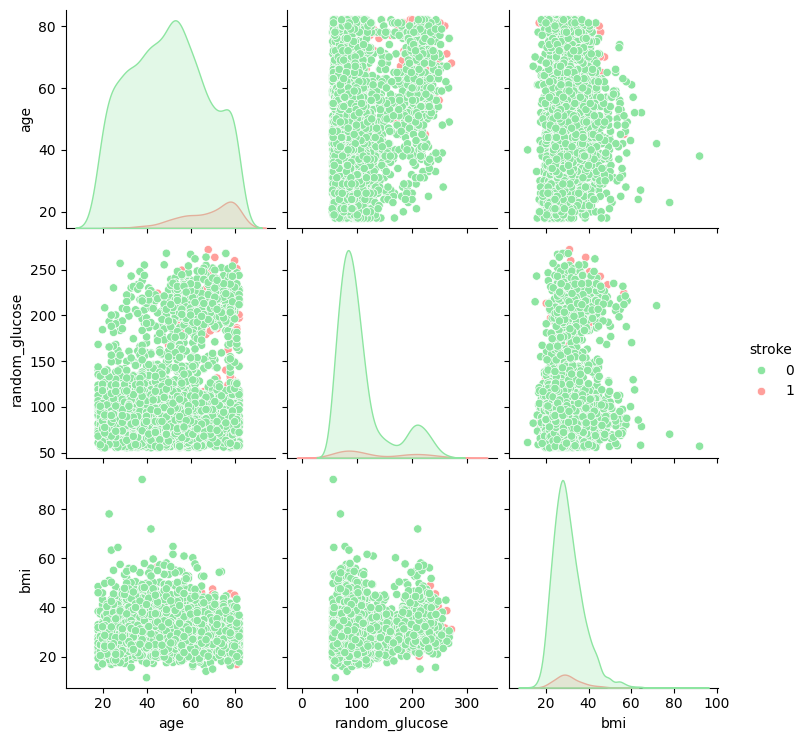

In [12]:
sns.pairplot(source_df, hue='stroke', palette=category_colors)
plt.show()

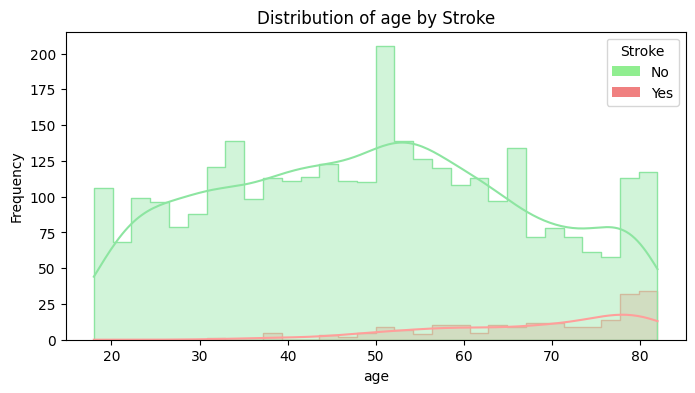

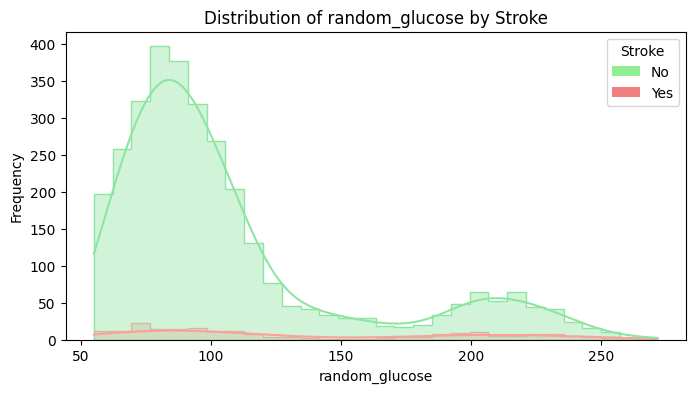

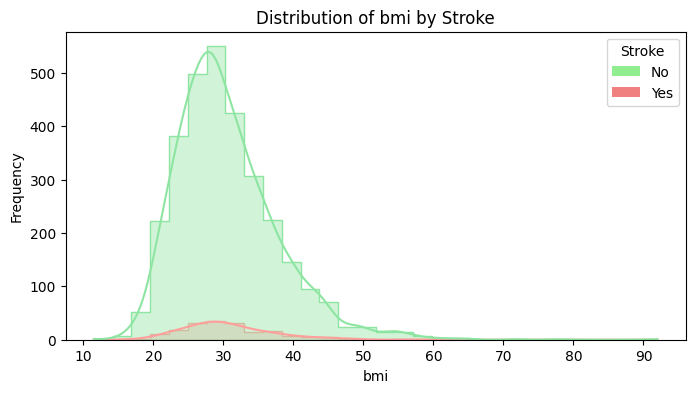

In [13]:
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=source_df, x=col, hue='stroke', kde=True, bins=30, palette=category_colors, element='step', alpha=0.4)
    plt.title(f'Distribution of {col} by Stroke')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    from matplotlib.patches import Patch
    legend_elements = [
        Patch(facecolor='lightgreen', label='No'),
        Patch(facecolor='lightcoral',label='Yes')
    ]
    plt.legend(handles=legend_elements, title='Stroke', loc='upper right')
    plt.show()

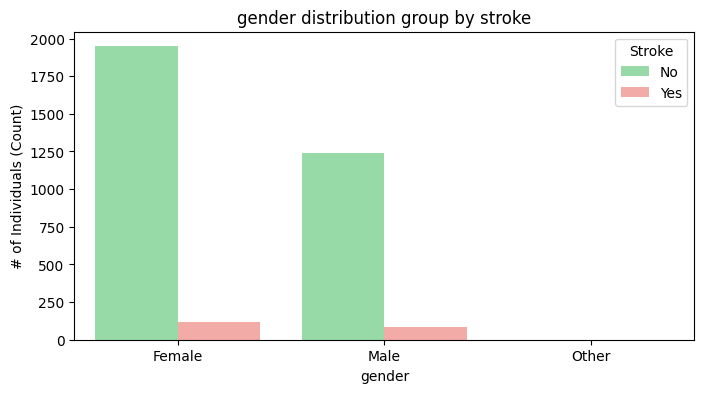

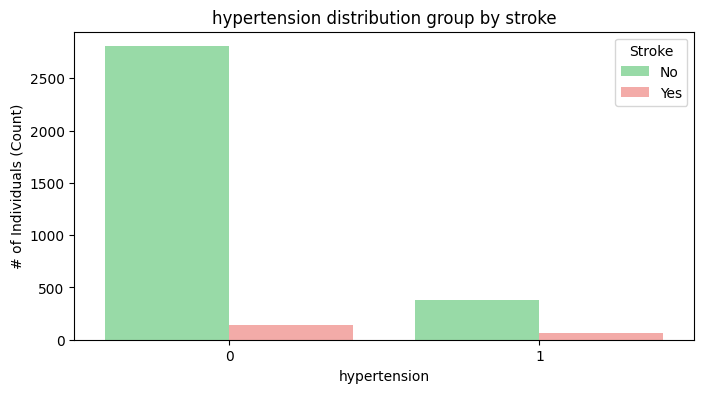

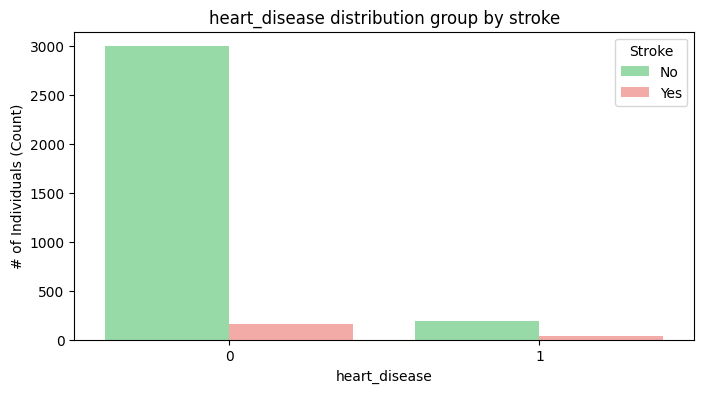

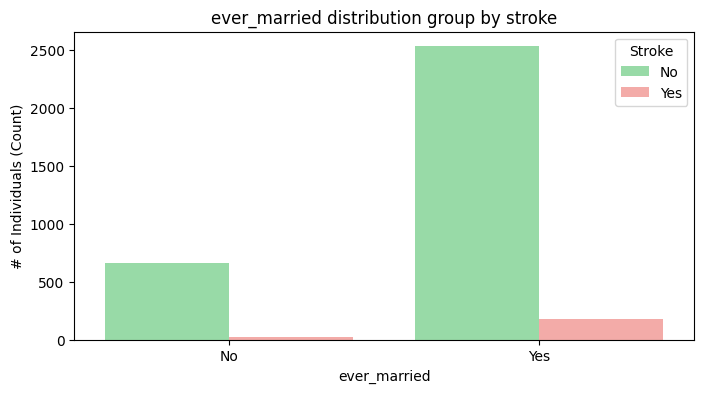

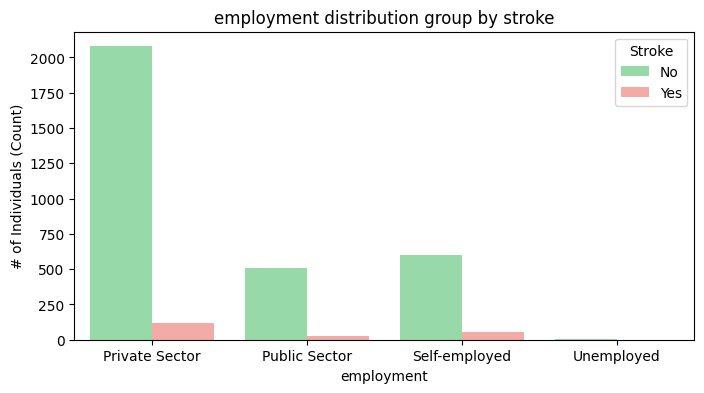

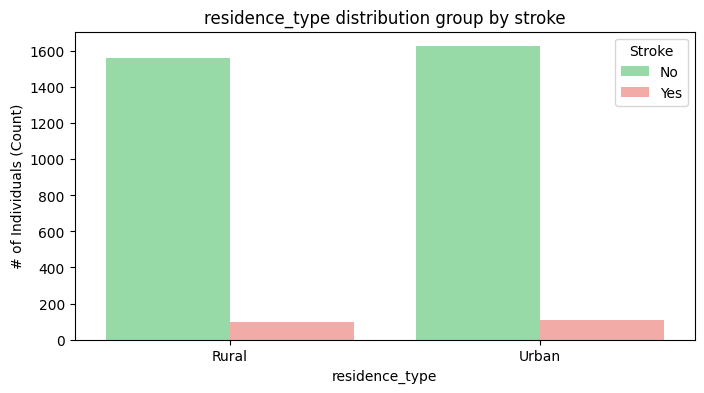

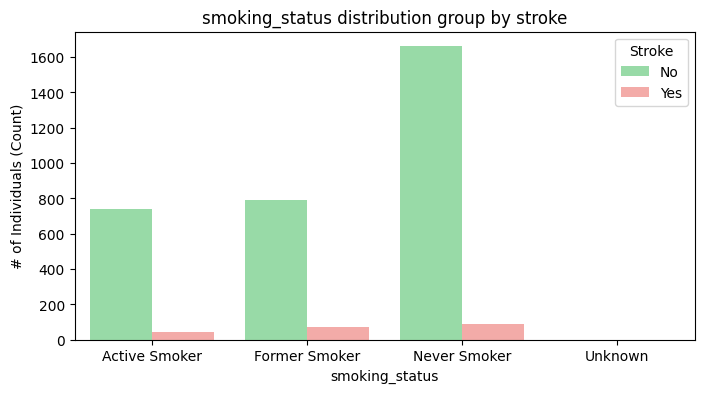

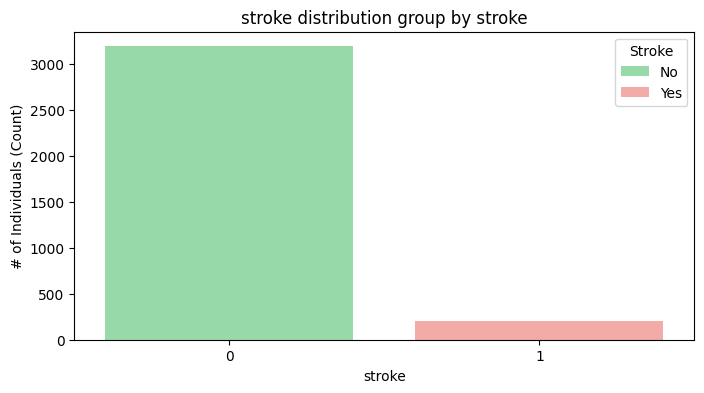

In [14]:
for feature in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=source_df, x=feature, hue='stroke', palette=category_colors )
    plt.title(f'{feature} distribution group by stroke')
    plt.xlabel(feature)
    plt.ylabel('# of Individuals (Count)')
    plt.legend(title='Stroke', labels=['No', 'Yes'])
    plt.show()

In [15]:
# bmi null value and stroke == 1
print("    Missing Values in BMI")
source_df[source_df['bmi'].isnull()]['stroke'].value_counts()

    Missing Values in BMI


,count
stroke,
0,114
1,22


In [16]:
source_df.stroke.value_counts()

,count
stroke,
0,3189
1,202


#### Finding : Out of 247 samples in class 1,  39 BMI samples are missing,
Although having interpolation like median is better here, because it is like 16% of the minority group but it didn't help and decreased the f1 score so we planned to drop it.


In [17]:
# source_df['bmi'] = source_df.groupby('stroke')['bmi'].transform(lambda x: x.fillna(x.median()))
source_df = source_df[~source_df['bmi'].isnull()]

### To check Obesity and Diabetes

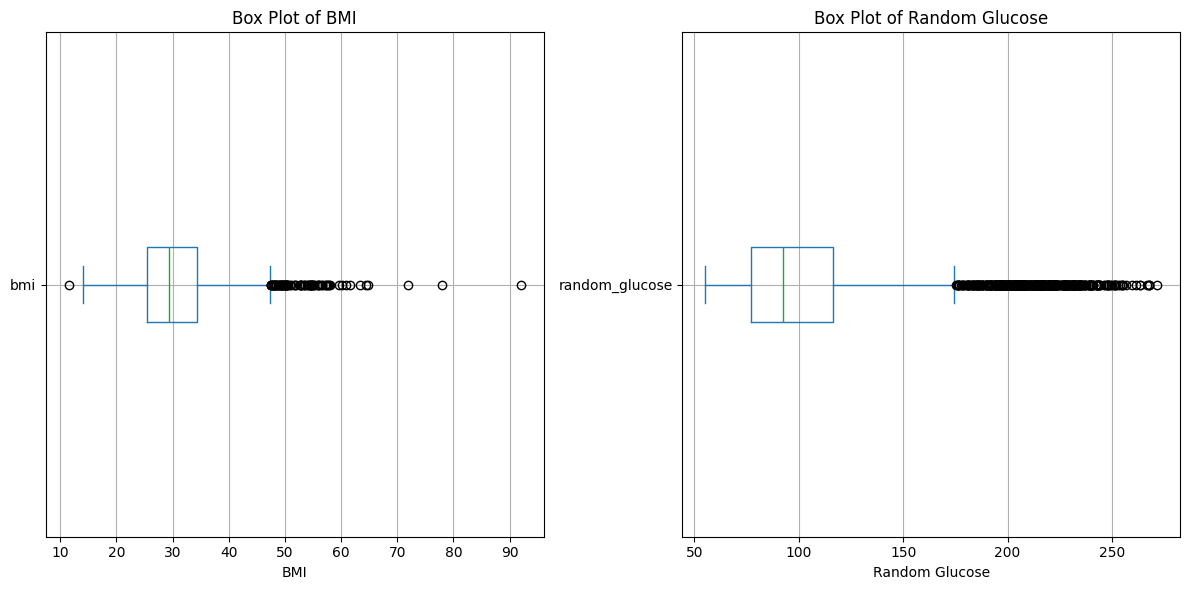

In [18]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
source_df['bmi'].plot(kind='box', vert=False, grid=True)
plt.title('Box Plot of BMI')
plt.xlabel('BMI')
plt.subplot(1, 2, 2)
source_df['random_glucose'].plot(kind='box', vert=False, grid=True)
plt.title('Box Plot of Random Glucose')
plt.xlabel('Random Glucose')
plt.tight_layout()
plt.show()

In [19]:
source_df['obesity'] = (source_df['bmi'] >= 30).astype(int)
source_df['diabetes'] = (source_df['random_glucose'] >= 200).astype(int)

source_df.drop(['bmi', 'random_glucose'], axis=1, inplace=True) # in order to prevent collinearity

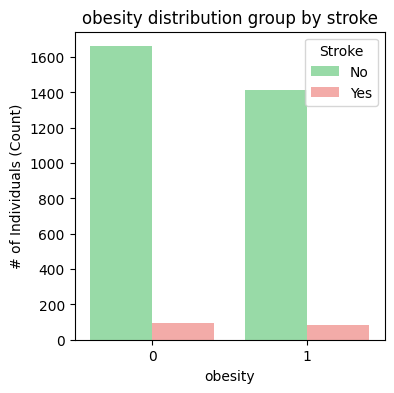

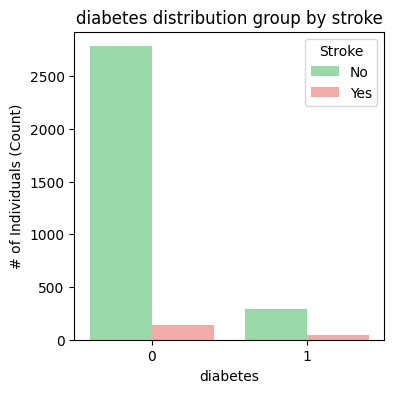

In [20]:
for health_condition in ['obesity', 'diabetes']:
  plt.figure(figsize=(4, 4))
  sns.countplot(data=source_df, x=health_condition, hue='stroke', palette=category_colors )
  plt.title(f'{health_condition} distribution group by stroke')
  plt.xlabel(health_condition)
  plt.ylabel('# of Individuals (Count)')
  plt.legend(title='Stroke', labels=['No', 'Yes'])
  plt.show()

# We will use kNN and Logistic regression model to detect the stoke


# Data Preprocessing : Inspect the levels of categorical variables


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

t_df = source_df.copy()

binary_cols = [
    'gender',
    # 'heart_disease',
    # 'hypertension',
    'ever_married',
    'residence_type'
    ]

#dummy_columns=[ 'employment', 'smoking_status']
smoking_dict = {
    # 'Unknown': 2, (drop - non informative, considering same meaning as null)
    'Never Smoker': 0,
    'Former Smoker': 1,
    'Active Smoker': 2,
}
# 'Private Sector' 'Self-employed' 'Public Sector' 'Unemployed' # Economic contribution
employment_dict = {
    'Unemployed': 0,
    'Public Sector': 1,
    'Self-employed': 2,
    'Private Sector': 3,
}

# WE SHOULD NOT USE LabelEncoder FOR encoding non-target values (technical thing mentioned in scikit-learn documentation)
# This transformer should be used to encode target values, *i.e.* y, and
# not the input X.

# def preprocess_data(source_df , binary_cols, smoking_dict, employment_dict):

#   t_df = source_df.copy()
#   label_dicts = {}
#   if 'smoking_status' in t_df.columns:
#     t_df['smoking_status'] = t_df['smoking_status'].map(smoking_dict)
#   if 'employment' in t_df.columns:
#     t_df['employment'] = t_df['employment'].map(employment_dict)

#   sel_binary_cols = [feature for feature in t_df.columns if feature in binary_cols]
#   label_encoders = {col: LabelEncoder() for col in sel_binary_cols}
#   for col in sel_binary_cols:
#       t_df[col] = label_encoders[col].fit_transform(t_df[col])
#       label_dicts[col] = dict(zip(label_encoders[col].classes_, range(len(label_encoders[col].classes_))))

#   #t_df = pd.get_dummies(t_df, columns=dummy_columns, drop_first=True)
#   display(t_df.sample(3))
#   #for col, dict_ in label_dicts.items():
#   #    print(f"Mapping for {col}: {dict_}")
#   return t_df, label_dicts

from sklearn.preprocessing import OneHotEncoder

def preprocess_data(source_df, binary_cols, smoking_dict, employment_dict):
    t_df = source_df.copy()

    # Map predefined dictionaries
    if 'smoking_status' in t_df.columns:
        t_df['smoking_status'] = t_df['smoking_status'].map(smoking_dict)
    if 'employment' in t_df.columns:
        t_df['employment'] = t_df['employment'].map(employment_dict)

    # Select columns for one-hot encoding
    sel_binary_cols = [feature for feature in t_df.columns if feature in binary_cols]

    if sel_binary_cols:
        one_hot_encoder = OneHotEncoder()  # Keep sparse matrix and encode all categories
        encoded_array = one_hot_encoder.fit_transform(t_df[sel_binary_cols])

        # Convert sparse matrix to DataFrame
        encoded_df = pd.DataFrame.sparse.from_spmatrix(
            encoded_array,
            columns=one_hot_encoder.get_feature_names_out(sel_binary_cols),
            index=t_df.index
        )

        # Drop the original columns and append the one-hot encoded columns
        t_df.drop(columns=sel_binary_cols, inplace=True)
        t_df = pd.concat([t_df, encoded_df], axis=1)

    # Display a sample of the processed DataFrame
    #display(t_df.sample(3))

    # Return processed DataFrame
    return t_df, None


In [22]:
t_df.dtypes

,0
gender,category
age,int64
hypertension,category
heart_disease,category
ever_married,category
employment,category
residence_type,category
smoking_status,category
stroke,category
obesity,int64


In [23]:
t_df, _ = preprocess_data(source_df, binary_cols, smoking_dict, employment_dict)

### Check for mulicollinearity among features


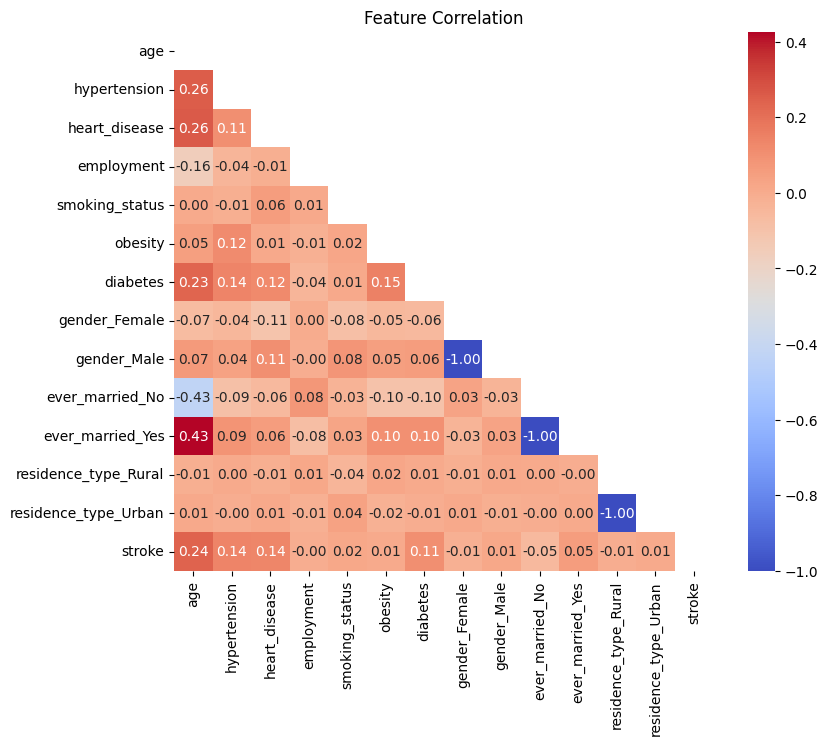

In [25]:
# Move stroke columns to the bottom row
stroke_col = t_df.pop('stroke')
t_df['stroke'] = stroke_col

corr_mtx = t_df.corr()
mask = np.triu(np.ones_like(corr_mtx, dtype=bool))

plt.figure(figsize=(9,7))
sns.heatmap(corr_mtx, annot=True, cmap='coolwarm', mask=mask, fmt='.2f', square=True)
plt.title("Feature Correlation")
plt.show()

### For individuals > 31-year-old
The minimum age for stroke patient starts at the age of 32 in the dataset,
we try to visualize subsample for age > 31 and inspect correlaction among features

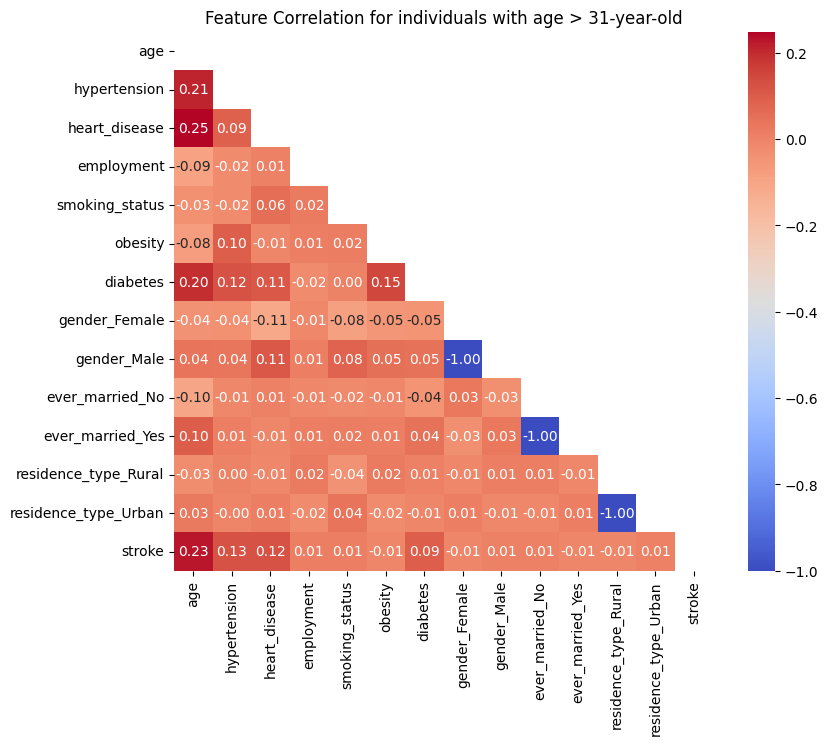

In [27]:
t_df_31 = source_df.copy()
t_df_31 = t_df_31[t_df_31['age']>31].reset_index(drop=True)


t_df_31, _ = preprocess_data(t_df_31, binary_cols, smoking_dict, employment_dict)

stroke_col = t_df_31.pop('stroke')
t_df_31['stroke'] = stroke_col

corr_mtx = t_df_31.corr()
mask = np.triu(np.ones_like(corr_mtx, dtype=bool))

plt.figure(figsize=(9,7))
sns.heatmap(corr_mtx, annot=True, cmap='coolwarm', mask=mask, fmt='.2f', square=True)
plt.title("Feature Correlation for individuals with age > 31-year-old")
plt.show()


#### Finding :
No meaningful results is observed

# Model Building

In [28]:
classes = t_df['stroke'].unique()
y = t_df.pop('stroke')
X = t_df.copy()

#classes = t_df_31['stroke'].unique()
#y = t_df_31.pop('stroke')
#X = t_df_31.copy()


display(X.sample(2))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("y_train value_counts", y_train.value_counts())
print("y_test value_counts", y_test.value_counts())
X_train.shape, X_test.shape, y_train.shape, y_test.shape


,age,hypertension,heart_disease,employment,smoking_status,obesity,diabetes,gender_Female,gender_Male,ever_married_No,ever_married_Yes,residence_type_Rural,residence_type_Urban
3377,72,0,0,3,1.0,1,0,1.0,0,0,1.0,0,1.0
894,48,0,0,3,2.0,0,0,0,1.0,0,1.0,0,1.0


y_train value_counts stroke
0    2460
1     144
Name: count, dtype: int64
y_test value_counts stroke
0    615
1     36
Name: count, dtype: int64


((2604, 13), (651, 13), (2604,), (651,))

## kNN

In [29]:
# 80-20 stratify sampling

knn = KNeighborsClassifier(metric='minkowski', n_neighbors=3, p=1, weights= 'distance')
knn.fit(X_train, y_train)
knn_y_pred = knn.predict(X_test)

print(confusion_matrix(y_test, knn_y_pred, labels=classes ) )
print(classification_report(y_test, knn_y_pred, labels=classes ))


[[  3  33]
 [ 24 591]]
              precision    recall  f1-score   support

           1       0.11      0.08      0.10        36
           0       0.95      0.96      0.95       615

    accuracy                           0.91       651
   macro avg       0.53      0.52      0.52       651
weighted avg       0.90      0.91      0.91       651



## LogisticRegression

In [30]:
lr = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')
lr.fit(X_train, y_train)
lr_y_pred = lr.predict(X_test)


print(confusion_matrix(y_test, lr_y_pred, labels=classes ) )
print(classification_report(y_test, lr_y_pred, labels=classes ))


[[ 30   6]
 [181 434]]
              precision    recall  f1-score   support

           1       0.14      0.83      0.24        36
           0       0.99      0.71      0.82       615

    accuracy                           0.71       651
   macro avg       0.56      0.77      0.53       651
weighted avg       0.94      0.71      0.79       651



In [31]:
t_df.sample(1)

,age,hypertension,heart_disease,employment,smoking_status,obesity,diabetes,gender_Female,gender_Male,ever_married_No,ever_married_Yes,residence_type_Rural,residence_type_Urban
2456,75,0,0,2,0.0,1,0,1.0,0,0,1.0,0,1.0


## Fine-tunning Paramerters - kNN

In [32]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['minkowski'],
    'p': [1, 2]
}

grid_search = GridSearchCV(KNeighborsClassifier(), params, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

y_pred = grid_search.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred, labels=classes ))
print(confusion_matrix(y_test, y_pred, labels=classes ) )

(best_params, best_score)

              precision    recall  f1-score   support

           1       0.10      0.06      0.07        36
           0       0.95      0.97      0.96       615

    accuracy                           0.92       651
   macro avg       0.52      0.51      0.51       651
weighted avg       0.90      0.92      0.91       651

[[  2  34]
 [ 19 596]]


({'metric': 'minkowski', 'n_neighbors': 6, 'p': 1, 'weights': 'distance'},
 0.09344358564707374)

## Fine-tunning Paramerters - LogisticRegression

In [33]:
params = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
}

log_reg = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')

grid_search = GridSearchCV( estimator=log_reg,param_grid=params, scoring='f1', cv=5, verbose=1, n_jobs=-1 )
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(best_params, best_score)

y_pred = grid_search.best_estimator_.predict(X_test)

print(classification_report(y_test, y_pred, labels=classes ))
print(confusion_matrix(y_test, y_pred, labels=classes ) )

Fitting 5 folds for each of 20 candidates, totalling 100 fits
{'C': 10, 'penalty': 'l1', 'solver': 'saga'} 0.22634346258656887
              precision    recall  f1-score   support

           1       0.12      0.58      0.20        36
           0       0.97      0.75      0.85       615

    accuracy                           0.74       651
   macro avg       0.54      0.67      0.52       651
weighted avg       0.92      0.74      0.81       651

[[ 21  15]
 [154 461]]


#### Finding :

With preliminary analysis result showing kNN has poor performance as compared to Logistic Regression, we drop kNN from our subsequent analysis.

# # RQ 1: Patient's factors influence stroke ?
- Demographic factors (e.g., age, sex)
- Social factors (ever_married, employment, residence type)
- Lifestyle (e.g., smoking_status )


In [34]:
demo_features = ['age', 'gender', 'residence_type' ]
social_features = ['employment', 'ever_married']
lifestyle_features = ['smoking_status']

In [35]:
## Write function to speed up the analysis

def preprocess_and_train_logistic_regression(source_df, sel_features , binary_cols, smoking_dict, employment_dict, plot=False):

    t_df = source_df.copy()[sel_features + ['stroke']]
    classes = t_df['stroke'].unique()

    display(t_df.sample(1))
    #sel_binary_cols = [feature for feature in t_df.columns if feature in binary_cols]
    #sel_dummy_cols = [feature for feature in t_df.columns if feature in dummy_columns]

    #print('binary columns ', sel_binary_cols)
    #print('dummy columns ', sel_dummy_cols)
    #print('numerical columns ', sel_numerical_cols)

    # encode binary columns
    #label_encoders = {col: LabelEncoder() for col in sel_binary_cols}
    #for col in sel_binary_cols:
    #    t_df[col] = label_encoders[col].fit_transform(t_df[col])

    # dummy processing
    #t_df = pd.get_dummies(t_df, columns=sel_dummy_cols, drop_first=True)

    t_df, _ = preprocess_data(t_df, binary_cols, smoking_dict, employment_dict)

    y = t_df.pop('stroke')
    X = t_df.copy()
    display(X.sample(2))

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    print("y_train value_counts", y_train.value_counts())
    print("y_test value_counts", y_test.value_counts())
    print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

    lr = LogisticRegression(max_iter=1000, C=0.01, penalty='l2', solver='saga', random_state=42, class_weight='balanced')
    #lr.fit(X_train, y_train)
    #lr_y_pred = lr.predict(X_test)
    param_grid = {
        'C': [0.01, 0.1, 1, 10, 100],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear', 'saga']
    }

    grid_search = GridSearchCV(lr, param_grid, scoring='f1', cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    #print("I Can run till here > No error")
    y_pred = grid_search.best_estimator_.predict(X_test)
    print(best_params, best_score)

    print(confusion_matrix(y_test, y_pred, labels=classes))
    print(classification_report(y_test, y_pred, labels=classes))
    if plot:
      sel_numerical_cols = t_df.select_dtypes(include=['number']).columns

      fig, axs = plt.subplots(1, 4, figsize=(20, 5))
      fig.tight_layout(pad=5.0)
      for i, feature in enumerate(sel_numerical_cols):
          row = i // 4
          col = i % 4

          X_feature = X[feature].values.reshape(-1, 1)
          y_feature = y

          log_reg.fit(X_feature, y_feature)

          x_test = np.linspace(X_feature.min(), X_feature.max(), 300).reshape(-1, 1)
          prob = log_reg.predict_proba(x_test)[:, 1]

          axs[i].scatter(X_feature, y_feature, color='#7569c9', label='Data points')
          axs[i].plot(x_test, prob, color='#e0d122', lw=3, label='Logistic regression curve')
          axs[i].set_title(f'Logistic Regression Curve - {feature}')
          axs[i].set_xlabel(feature)
          axs[i].set_ylabel('Probability')
          axs[i].legend()
      plt.show()
    return X_train, X_test, y_train, y_test


### I. Only demographic features

In [36]:
sel_features = demo_features

_, _, _, _ = preprocess_and_train_logistic_regression(source_df, sel_features , binary_cols, smoking_dict, employment_dict)

,age,gender,residence_type,stroke
499,55,Female,Rural,0


,age,gender_Female,gender_Male,residence_type_Rural,residence_type_Urban
2911,48,1.0,0,1.0,0
2446,40,1.0,0,1.0,0


y_train value_counts stroke
0    2460
1     144
Name: count, dtype: int64
y_test value_counts stroke
0    615
1     36
Name: count, dtype: int64
(2604, 5) (651, 5) (2604,) (651,)
{'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'} 0.21145206145206147
[[ 29   7]
 [185 430]]
              precision    recall  f1-score   support

           1       0.14      0.81      0.23        36
           0       0.98      0.70      0.82       615

    accuracy                           0.71       651
   macro avg       0.56      0.75      0.52       651
weighted avg       0.94      0.71      0.79       651



#### Only demographic features , age > 31

In [37]:
t_df = source_df[source_df['age']>31]
t_df = t_df.reset_index(drop=True)
_, _, _, _ = preprocess_and_train_logistic_regression(t_df , sel_features , binary_cols, smoking_dict, employment_dict)

,age,gender,residence_type,stroke
1898,38,Male,Urban,0


,age,gender_Female,gender_Male,residence_type_Rural,residence_type_Urban
1943,52,1.0,0,0,1.0
2167,69,0,1.0,0,1.0


y_train value_counts stroke
0    1991
1     144
Name: count, dtype: int64
y_test value_counts stroke
0    498
1     36
Name: count, dtype: int64
(2135, 5) (534, 5) (2135,) (534,)
{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'} 0.23227231158020084
[[ 25  11]
 [184 314]]
              precision    recall  f1-score   support

           1       0.12      0.69      0.20        36
           0       0.97      0.63      0.76       498

    accuracy                           0.63       534
   macro avg       0.54      0.66      0.48       534
weighted avg       0.91      0.63      0.73       534



### II. Demo + lifestyle

In [38]:
_, _, _, _ =preprocess_and_train_logistic_regression(source_df, demo_features+lifestyle_features , binary_cols, smoking_dict, employment_dict)

,age,gender,residence_type,smoking_status,stroke
317,33,Female,Rural,Active Smoker,0


,age,smoking_status,gender_Female,gender_Male,residence_type_Rural,residence_type_Urban
1167,40,0.0,1.0,0,0,1.0
1571,59,2.0,0,1.0,0,1.0


y_train value_counts stroke
0    2460
1     144
Name: count, dtype: int64
y_test value_counts stroke
0    615
1     36
Name: count, dtype: int64
(2604, 6) (651, 6) (2604,) (651,)
{'C': 10, 'penalty': 'l1', 'solver': 'liblinear'} 0.22821675941316721
[[ 29   7]
 [185 430]]
              precision    recall  f1-score   support

           1       0.14      0.81      0.23        36
           0       0.98      0.70      0.82       615

    accuracy                           0.71       651
   macro avg       0.56      0.75      0.52       651
weighted avg       0.94      0.71      0.79       651



#### Demo + lifestyle , age>31

In [39]:
_, _, _, _ =preprocess_and_train_logistic_regression(t_df, demo_features+lifestyle_features , binary_cols, smoking_dict, employment_dict)

,age,gender,residence_type,smoking_status,stroke
2087,59,Male,Urban,Former Smoker,0


,age,smoking_status,gender_Female,gender_Male,residence_type_Rural,residence_type_Urban
2380,49,0.0,0,1.0,1.0,0
1624,62,0.0,0,1.0,1.0,0


y_train value_counts stroke
0    1991
1     144
Name: count, dtype: int64
y_test value_counts stroke
0    498
1     36
Name: count, dtype: int64
(2135, 6) (534, 6) (2135,) (534,)
{'C': 0.1, 'penalty': 'l2', 'solver': 'saga'} 0.23881988000309073
[[ 26  10]
 [179 319]]
              precision    recall  f1-score   support

           1       0.13      0.72      0.22        36
           0       0.97      0.64      0.77       498

    accuracy                           0.65       534
   macro avg       0.55      0.68      0.49       534
weighted avg       0.91      0.65      0.73       534



### III. Demo + social + lifestyle

In [40]:
_, _, _, _ = preprocess_and_train_logistic_regression(source_df, demo_features+lifestyle_features+social_features ,binary_cols, smoking_dict, employment_dict)

,age,gender,residence_type,smoking_status,employment,ever_married,stroke
600,52,Male,Rural,Never Smoker,Private Sector,Yes,0


,age,smoking_status,employment,gender_Female,gender_Male,residence_type_Rural,residence_type_Urban,ever_married_No,ever_married_Yes
1879,27,1.0,3,1.0,0,0,1.0,0,1.0
2704,26,0.0,3,1.0,0,1.0,0,1.0,0


y_train value_counts stroke
0    2460
1     144
Name: count, dtype: int64
y_test value_counts stroke
0    615
1     36
Name: count, dtype: int64
(2604, 9) (651, 9) (2604,) (651,)
{'C': 10, 'penalty': 'l1', 'solver': 'saga'} 0.22206086881598908
[[ 29   7]
 [185 430]]
              precision    recall  f1-score   support

           1       0.14      0.81      0.23        36
           0       0.98      0.70      0.82       615

    accuracy                           0.71       651
   macro avg       0.56      0.75      0.52       651
weighted avg       0.94      0.71      0.79       651



#### Demo + social + lifestyle , age > 31

In [41]:
_, _, _, _ = preprocess_and_train_logistic_regression(t_df, demo_features+lifestyle_features+social_features , binary_cols, smoking_dict, employment_dict)

,age,gender,residence_type,smoking_status,employment,ever_married,stroke
1549,60,Male,Rural,Never Smoker,Private Sector,Yes,0


,age,smoking_status,employment,gender_Female,gender_Male,residence_type_Rural,residence_type_Urban,ever_married_No,ever_married_Yes
2137,66,2.0,2,0,1.0,0,1.0,0,1.0
1830,72,0.0,3,1.0,0,0,1.0,0,1.0


y_train value_counts stroke
0    1991
1     144
Name: count, dtype: int64
y_test value_counts stroke
0    498
1     36
Name: count, dtype: int64
(2135, 9) (534, 9) (2135,) (534,)
{'C': 0.01, 'penalty': 'l2', 'solver': 'saga'} 0.23810669096062353
[[ 27   9]
 [182 316]]
              precision    recall  f1-score   support

           1       0.13      0.75      0.22        36
           0       0.97      0.63      0.77       498

    accuracy                           0.64       534
   macro avg       0.55      0.69      0.49       534
weighted avg       0.92      0.64      0.73       534



In [42]:
source_df.head(2)

,gender,age,hypertension,heart_disease,ever_married,employment,residence_type,smoking_status,stroke,obesity,diabetes
0,Male,67,0,1,Yes,Private Sector,Urban,Former Smoker,1,1,1
2,Male,80,0,1,Yes,Private Sector,Rural,Never Smoker,1,1,0


# RQ 2: Patients with comorbidites such as hypertension has higher likelihood of rate ofstoke ?

### I. Only demographic features with all the health conditions

In [43]:
existing_conditions = ['hypertension', 'heart_disease', 'diabetes', 'obesity']
binary_cols = ['gender', 'ever_married', 'residence_type'] + existing_conditions

sel_features = demo_features + existing_conditions

_, _, _, _ = preprocess_and_train_logistic_regression(source_df, sel_features , binary_cols, smoking_dict, employment_dict)

,age,gender,residence_type,hypertension,heart_disease,diabetes,obesity,stroke
816,28,Female,Rural,0,0,0,0,0


,age,gender_Female,gender_Male,residence_type_Rural,residence_type_Urban,hypertension_0,hypertension_1,heart_disease_0,heart_disease_1,diabetes_0,diabetes_1,obesity_0,obesity_1
2649,54,1.0,0,0,1.0,0,1.0,1.0,0,0,1.0,0,1.0
309,31,1.0,0,1.0,0,1.0,0,1.0,0,1.0,0,0,1.0


y_train value_counts stroke
0    2460
1     144
Name: count, dtype: int64
y_test value_counts stroke
0    615
1     36
Name: count, dtype: int64
(2604, 13) (651, 13) (2604,) (651,)
{'C': 0.01, 'penalty': 'l2', 'solver': 'saga'} 0.21959886717359106
[[ 29   7]
 [180 435]]
              precision    recall  f1-score   support

           1       0.14      0.81      0.24        36
           0       0.98      0.71      0.82       615

    accuracy                           0.71       651
   macro avg       0.56      0.76      0.53       651
weighted avg       0.94      0.71      0.79       651



### II. demo_features + lifestyle_features + all the health conditions

In [44]:
sel_features = demo_features + lifestyle_features + existing_conditions

_, _, _, _ = preprocess_and_train_logistic_regression(source_df, sel_features , binary_cols, smoking_dict, employment_dict)

,age,gender,residence_type,smoking_status,hypertension,heart_disease,diabetes,obesity,stroke
150,61,Male,Urban,Active Smoker,1,1,0,1,1


,age,smoking_status,gender_Female,gender_Male,residence_type_Rural,residence_type_Urban,hypertension_0,hypertension_1,heart_disease_0,heart_disease_1,diabetes_0,diabetes_1,obesity_0,obesity_1
385,67,0.0,0,1.0,0,1.0,1.0,0,1.0,0,1.0,0,1.0,0
3337,26,0.0,1.0,0,1.0,0,1.0,0,1.0,0,1.0,0,1.0,0


y_train value_counts stroke
0    2460
1     144
Name: count, dtype: int64
y_test value_counts stroke
0    615
1     36
Name: count, dtype: int64
(2604, 14) (651, 14) (2604,) (651,)
{'C': 0.01, 'penalty': 'l2', 'solver': 'saga'} 0.22584368216924683
[[ 30   6]
 [181 434]]
              precision    recall  f1-score   support

           1       0.14      0.83      0.24        36
           0       0.99      0.71      0.82       615

    accuracy                           0.71       651
   macro avg       0.56      0.77      0.53       651
weighted avg       0.94      0.71      0.79       651



### III. demo_features + lifestyle_features + social_features + all existing_conditions

In [45]:
sel_features = demo_features + lifestyle_features + social_features + existing_conditions

_, _, _, _ = preprocess_and_train_logistic_regression(source_df, sel_features , binary_cols, smoking_dict, employment_dict)

,age,gender,residence_type,smoking_status,employment,ever_married,hypertension,heart_disease,diabetes,obesity,stroke
364,60,Male,Rural,Former Smoker,Private Sector,Yes,0,0,0,0,0


,age,smoking_status,employment,gender_Female,gender_Male,residence_type_Rural,residence_type_Urban,ever_married_No,ever_married_Yes,hypertension_0,hypertension_1,heart_disease_0,heart_disease_1,diabetes_0,diabetes_1,obesity_0,obesity_1
3089,21,2.0,3,0,1.0,1.0,0,1.0,0,1.0,0,1.0,0,1.0,0,1.0,0
1485,67,2.0,3,1.0,0,0,1.0,0,1.0,0,1.0,1.0,0,1.0,0,0,1.0


y_train value_counts stroke
0    2460
1     144
Name: count, dtype: int64
y_test value_counts stroke
0    615
1     36
Name: count, dtype: int64
(2604, 17) (651, 17) (2604,) (651,)
{'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'} 0.22278130723317308
[[ 30   6]
 [185 430]]
              precision    recall  f1-score   support

           1       0.14      0.83      0.24        36
           0       0.99      0.70      0.82       615

    accuracy                           0.71       651
   macro avg       0.56      0.77      0.53       651
weighted avg       0.94      0.71      0.79       651



### IV. demo_features + lifestyle_features + social features
- Inspect for each condition
- Add SMOTE Oversampling approach

In [46]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_recall_curve

for condition in existing_conditions:
  print('*'*15)
  print(f"Condition: {condition}")
  sel_features = demo_features + lifestyle_features + social_features + [ condition ]
  X_train, X_test, y_train, y_test = preprocess_and_train_logistic_regression(source_df, sel_features , binary_cols, smoking_dict, employment_dict)

  smote = SMOTE(random_state=42)
  X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
  print("Oversampling Count")
  print(y_train_resampled.value_counts())
  param_grid = {
      'C': [0.01, 0.1, 1, 10, 100],
      'penalty': ['l1', 'l2'],
      'solver': ['liblinear', 'saga']
  }
  print("perform oversampling")
  print('-'*15)
  grid_search = GridSearchCV(lr, param_grid, scoring='f1', cv=5, n_jobs=-1)
  grid_search.fit(X_train_resampled, y_train_resampled)

  print("Accuracy before Adjusting Threshold")

  y_pred = grid_search.best_estimator_.predict(X_test)
  print(confusion_matrix(y_test, y_pred, labels=classes))
  print(classification_report(y_test, y_pred, labels=classes))

  print("Accuracy with Adjusting Threshold")

  y_probs = grid_search.best_estimator_.predict_proba(X_test)[:, 1]

  precision, recall, thresh_ = precision_recall_curve(y_test, y_probs)
  thresh_adj = thresh_[np.argmax(recall * precision)]
  print(thresh_adj)
  y_pred_adj = (y_probs >= thresh_adj).astype(int)

  print(confusion_matrix(y_test, y_pred_adj, labels=classes))
  print(classification_report(y_test, y_pred_adj, labels=classes))



***************
Condition: hypertension


,age,gender,residence_type,smoking_status,employment,ever_married,hypertension,stroke
2481,60,Female,Rural,Never Smoker,Self-employed,Yes,0,0


,age,smoking_status,employment,gender_Female,gender_Male,residence_type_Rural,residence_type_Urban,ever_married_No,ever_married_Yes,hypertension_0,hypertension_1
2429,82,2.0,2,0,1.0,0,1.0,1.0,0,1.0,0
1329,68,2.0,1,1.0,0,0,1.0,1.0,0,1.0,0


y_train value_counts stroke
0    2460
1     144
Name: count, dtype: int64
y_test value_counts stroke
0    615
1     36
Name: count, dtype: int64
(2604, 11) (651, 11) (2604,) (651,)
{'C': 0.01, 'penalty': 'l2', 'solver': 'saga'} 0.21661912460473678
[[ 28   8]
 [192 423]]
              precision    recall  f1-score   support

           1       0.13      0.78      0.22        36
           0       0.98      0.69      0.81       615

    accuracy                           0.69       651
   macro avg       0.55      0.73      0.51       651
weighted avg       0.93      0.69      0.78       651

Oversampling Count
stroke
0    2460
1    2460
Name: count, dtype: int64
perform oversampling
---------------
Accuracy before Adjusting Threshold
[[ 30   6]
 [184 431]]
              precision    recall  f1-score   support

           1       0.14      0.83      0.24        36
           0       0.99      0.70      0.82       615

    accuracy                           0.71       651
   macro avg    

,age,gender,residence_type,smoking_status,employment,ever_married,heart_disease,stroke
2562,40,Female,Urban,Never Smoker,Private Sector,Yes,0,0


,age,smoking_status,employment,gender_Female,gender_Male,residence_type_Rural,residence_type_Urban,ever_married_No,ever_married_Yes,heart_disease_0,heart_disease_1
616,46,0.0,2,1.0,0,0,1.0,0,1.0,1.0,0
698,27,0.0,3,1.0,0,0,1.0,1.0,0,1.0,0


y_train value_counts stroke
0    2460
1     144
Name: count, dtype: int64
y_test value_counts stroke
0    615
1     36
Name: count, dtype: int64
(2604, 11) (651, 11) (2604,) (651,)
{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'} 0.22048661132981567
[[ 29   7]
 [187 428]]
              precision    recall  f1-score   support

           1       0.13      0.81      0.23        36
           0       0.98      0.70      0.82       615

    accuracy                           0.70       651
   macro avg       0.56      0.75      0.52       651
weighted avg       0.94      0.70      0.78       651

Oversampling Count
stroke
0    2460
1    2460
Name: count, dtype: int64
perform oversampling
---------------
Accuracy before Adjusting Threshold
[[ 30   6]
 [188 427]]
              precision    recall  f1-score   support

           1       0.14      0.83      0.24        36
           0       0.99      0.69      0.81       615

    accuracy                           0.70       651
   macro avg  

,age,gender,residence_type,smoking_status,employment,ever_married,diabetes,stroke
1100,65,Female,Rural,Former Smoker,Self-employed,Yes,0,0


,age,smoking_status,employment,gender_Female,gender_Male,residence_type_Rural,residence_type_Urban,ever_married_No,ever_married_Yes,diabetes_0,diabetes_1
3295,22,0.0,3,1.0,0,0,1.0,1.0,0,1.0,0
2178,40,0.0,2,0,1.0,1.0,0,0,1.0,1.0,0


y_train value_counts stroke
0    2460
1     144
Name: count, dtype: int64
y_test value_counts stroke
0    615
1     36
Name: count, dtype: int64
(2604, 11) (651, 11) (2604,) (651,)
{'C': 1, 'penalty': 'l2', 'solver': 'saga'} 0.2247674648460422
[[ 30   6]
 [188 427]]
              precision    recall  f1-score   support

           1       0.14      0.83      0.24        36
           0       0.99      0.69      0.81       615

    accuracy                           0.70       651
   macro avg       0.56      0.76      0.53       651
weighted avg       0.94      0.70      0.78       651

Oversampling Count
stroke
0    2460
1    2460
Name: count, dtype: int64
perform oversampling
---------------
Accuracy before Adjusting Threshold
[[ 30   6]
 [191 424]]
              precision    recall  f1-score   support

           1       0.14      0.83      0.23        36
           0       0.99      0.69      0.81       615

    accuracy                           0.70       651
   macro avg       0

,age,gender,residence_type,smoking_status,employment,ever_married,obesity,stroke
233,58,Male,Rural,Active Smoker,Public Sector,Yes,0,0


,age,smoking_status,employment,gender_Female,gender_Male,residence_type_Rural,residence_type_Urban,ever_married_No,ever_married_Yes,obesity_0,obesity_1
2496,42,0.0,3,1.0,0,0,1.0,1.0,0,0,1.0
636,26,0.0,3,0,1.0,0,1.0,1.0,0,0,1.0


y_train value_counts stroke
0    2460
1     144
Name: count, dtype: int64
y_test value_counts stroke
0    615
1     36
Name: count, dtype: int64
(2604, 11) (651, 11) (2604,) (651,)
{'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'} 0.21930256095932465
[[ 29   7]
 [190 425]]
              precision    recall  f1-score   support

           1       0.13      0.81      0.23        36
           0       0.98      0.69      0.81       615

    accuracy                           0.70       651
   macro avg       0.56      0.75      0.52       651
weighted avg       0.94      0.70      0.78       651

Oversampling Count
stroke
0    2460
1    2460
Name: count, dtype: int64
perform oversampling
---------------
Accuracy before Adjusting Threshold
[[ 29   7]
 [188 427]]
              precision    recall  f1-score   support

           1       0.13      0.81      0.23        36
           0       0.98      0.69      0.81       615

    accuracy                           0.70       651
   macro avg

# Model Evaluation

- side by side bart chart visualizing - f1, recall, precision and accuracy.
- model1 -> demo + life + social + diabetes
- model2 -> demo + life + social + obesity
- model3 -> demo + life + social + heart disease
- model4 -> demo + life + social + hypertension
- precision recall f1-score

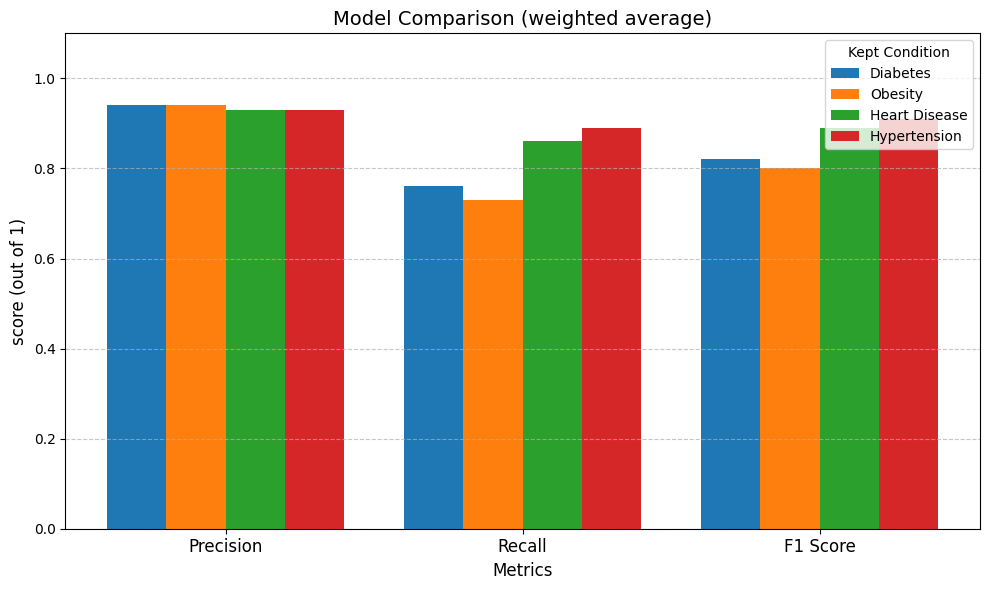

In [47]:
import matplotlib.pyplot as plt
import numpy as np

# the weighted average line after justifying the classification threshold

# Define metrics for 4 models
models = ['Diabetes', 'Obesity', 'Heart Disease', 'Hypertension']
precision = [0.94, 0.94, 0.93, 0.93]
recall = [0.76, 0.73, 0.86, 0.89]
f1_score = [0.82, 0.80, 0.89, 0.91]

# Define custom colors for each model
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

metrics = ['Precision', 'Recall', 'F1 Score']
data = [precision, recall, f1_score]
x = np.arange(len(metrics))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

for i, model in enumerate(models):
    ax.bar(x + i * width, [data[j][i] for j in range(len(data))], width, label=model, color=colors[i])

ax.set_xlabel('Metrics', fontsize=12)
ax.set_ylabel('score (out of 1)', fontsize=12)
ax.set_title('Model Comparison (weighted average)', fontsize=14)
ax.set_xticks(x + width * 1.5)
ax.set_xticklabels(metrics, fontsize=12)
ax.legend(title='Kept Condition', fontsize=10)
ax.set_ylim(0, 1.1)  # Assuming scores are between 0 and 1
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()